In [1]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, MultiPolygon

In [2]:
templos = pd.read_csv('dfCategorizado.csv')
bairros = pd.read_csv('bairrosFortaleza2019.csv')
pop2020 = pd.read_csv('pop2020.csv')

bairros['the_geom'] = gpd.GeoSeries.from_wkt(bairros['the_geom'])
gBairros = gpd.GeoDataFrame(bairros, geometry='the_geom')


# Merge Bairros e População:

In [6]:
gBairros.sort_values(by=['bairro'],ascending = True).head(2)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,qtd_arenin,qtd_ecopon,fonte,anoref,epsg_codif,FONTE,ANO_REF,DESCRICAO,NOME,FLA_LEG
110,vw_fortaleza_limites_administrativos_2020.fid-...,91,91,"MULTIPOLYGON (((-38.51707 -3.76988, -38.51704 ...",Aerolândia,SER VI,1104918.580,110.492,1.105,4820.932,...,0,0,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 6<...,Aerolândia,Bairros de Fortaleza
62,vw_fortaleza_limites_administrativos_2020.fid-...,92,92,"MULTIPOLYGON (((-38.55038 -3.77092, -38.55038 ...",Aeroporto,SER IV,6232707.614,623.271,6.233,13270.685,...,0,0,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 4<...,Aeroporto,Bairros de Fortaleza


In [7]:
gBairros['fbairro'] = gBairros['bairro'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [8]:
pop2020.head(5)

,BAIRRO,0-9,10-18,19-59,60+,TOTAL
0,AEROLANDIA,1614,1949,7537,1345,12445
1,AEROPORTO,1549,1899,5466,528,9442
2,ALDEOTA,3694,5064,29621,8032,46411
3,ALTO DA BALANCA,1861,2027,8391,1760,14039
4,ALVARO WEYNE,3367,3891,15594,3103,25955


In [9]:
pop2020['fbairro'] = pop2020['BAIRRO'].str.lower()
pop2020.head(5)

,BAIRRO,0-9,10-18,19-59,60+,TOTAL,fbairro
0,AEROLANDIA,1614,1949,7537,1345,12445,aerolandia
1,AEROPORTO,1549,1899,5466,528,9442,aeroporto
2,ALDEOTA,3694,5064,29621,8032,46411,aldeota
3,ALTO DA BALANCA,1861,2027,8391,1760,14039,alto da balanca
4,ALVARO WEYNE,3367,3891,15594,3103,25955,alvaro weyne


In [10]:
pd.merge(gBairros, pop2020, on ='fbairro').shape

(106, 42)

In [11]:
# pd.merge(gBairros, pop2020, left_on ='bairro', right_on='BAIRRO')
teste_merge_pop = pd.merge(gBairros, pop2020, on ='fbairro', how='outer', indicator=True)
teste_merge_pop.head(2)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,NOME,FLA_LEG,fbairro,BAIRRO,0-9,10-18,19-59,60+,TOTAL,_merge
0,vw_fortaleza_limites_administrativos_2020.fid-...,95.0,95.0,"MULTIPOLYGON (((-38.53142 -3.79758, -38.53125 ...",Boa Vista/Castelão,SER VI,2957500.947,295.750,2.958,8249.362,...,Boa Vista/Castelão,Bairros de Fortaleza,boa vista/castelao,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,vw_fortaleza_limites_administrativos_2020.fid-...,40.0,40.0,"MULTIPOLYGON (((-38.59200 -3.73483, -38.59198 ...",Antônio Bezerra,SER III,2196940.509,219.694,2.197,6614.089,...,Antônio Bezerra,Bairros de Fortaleza,antonio bezerra,ANTONIO BEZERRA,3643.0,4356.0,17225.0,3092.0,28316.0,both


In [12]:
print(";\t".join(teste_merge_pop.loc[teste_merge_pop._merge == 'right_only']['fbairro'].to_list()))
# pop2020

boa vista;	bom sucesso;	guajiru;	lourdes;	luciano cavalcante;	palmeiras;	pan americano;	parque genibau;	planalto airton senna;	praia do meireles;	sao gerardo/alagadico;	sao joao do tauape;	sapiranga coite;	vila ellery;	vila manoel satiro


In [13]:
print(";\t".join(teste_merge_pop.loc[teste_merge_pop._merge == 'left_only']['fbairro'].to_list()))
# gBairros

boa vista/castelao;	ellery;	sao gerardo;	meireles;	manoel satiro;	engenheiro luciano cavalcante;	de lourdes;	bonsucesso;	panamericano;	genibau;	planalto ayrton senna;	guajeru;	conjunto palmeiras;	tauape;	sapiranga/coite


In [14]:
# ref = {}
# lista = teste_merge_pop.loc[teste_merge_pop._merge == 'left_only']['fbairro'].to_list();
# for p in lista:
#     ref[p] = ''
# ref 


ref = {'boa vista/castelao': 'boa vista',
 'ellery': 'vila ellery',
 'sao gerardo': 'sao gerardo/alagadico',
 'meireles': 'praia do meireles',
 'manoel satiro': 'vila manoel satiro',
 'engenheiro luciano cavalcante': 'luciano cavalcante',
 'de lourdes': 'lourdes',
 'bonsucesso': 'bom sucesso',
 'panamericano': 'pan americano',
 'genibau': 'parque genibau',
 'planalto ayrton senna': 'planalto airton senna',
 'guajeru': 'guajiru',
 'conjunto palmeiras': 'palmeiras',
 'tauape': 'sao joao do tauape',
 'sapiranga/coite': 'sapiranga coite'}


print(ref)

gBairros = gBairros.replace({'fbairro':ref})

{'boa vista/castelao': 'boa vista', 'ellery': 'vila ellery', 'sao gerardo': 'sao gerardo/alagadico', 'meireles': 'praia do meireles', 'manoel satiro': 'vila manoel satiro', 'engenheiro luciano cavalcante': 'luciano cavalcante', 'de lourdes': 'lourdes', 'bonsucesso': 'bom sucesso', 'panamericano': 'pan americano', 'genibau': 'parque genibau', 'planalto ayrton senna': 'planalto airton senna', 'guajeru': 'guajiru', 'conjunto palmeiras': 'palmeiras', 'tauape': 'sao joao do tauape', 'sapiranga/coite': 'sapiranga coite'}


In [15]:
gBairros_pop = pd.merge(gBairros, pop2020, on ='fbairro')
gBairros_pop.head(1)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,DESCRICAO,NOME,FLA_LEG,fbairro,BAIRRO,0-9,10-18,19-59,60+,TOTAL
0,vw_fortaleza_limites_administrativos_2020.fid-...,95,95,"MULTIPOLYGON (((-38.53142 -3.79758, -38.53125 ...",Boa Vista/Castelão,SER VI,2957500.947,295.75,2.958,8249.362,...,<br><div><strong>Regional 2020: </strong>SR 8<...,Boa Vista/Castelão,Bairros de Fortaleza,boa vista,BOA VISTA,2187,2185,8043,1003,13418


In [16]:
gBairros_pop.to_file("bairrosFortaleza.geojson", driver="GeoJSON")

# Merge Templos/Bairros - Atribuindo um bairro para cada templo:

In [17]:
# gBairros.filter(['id','the_geom','bairro']).head(5)
gBairros.head(2)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,qtd_ecopon,fonte,anoref,epsg_codif,FONTE,ANO_REF,DESCRICAO,NOME,FLA_LEG,fbairro
0,vw_fortaleza_limites_administrativos_2020.fid-...,95,95,"MULTIPOLYGON (((-38.53142 -3.79758, -38.53125 ...",Boa Vista/Castelão,SER VI,2957500.947,295.750,2.958,8249.362,...,0,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 8<...,Boa Vista/Castelão,Bairros de Fortaleza,boa vista
1,vw_fortaleza_limites_administrativos_2020.fid-...,40,40,"MULTIPOLYGON (((-38.59200 -3.73483, -38.59198 ...",Antônio Bezerra,SER III,2196940.509,219.694,2.197,6614.089,...,1,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 3<...,Antônio Bezerra,Bairros de Fortaleza,antonio bezerra


In [18]:
# gBairros['bairro'].value_counts().head()

In [19]:
templos.filter(['inscricao','lat_gMaps','lng_gMaps']).head(5)

,inscricao,lat_gMaps,lng_gMaps
0,230390-6,-3.766739,-38.557352
1,210264-1,-3.748023,-38.566653
2,7945-6,-3.744585,-38.554720
3,8615-0,-3.744217,-38.553188
4,606258-0,-3.798258,-38.568871


In [20]:
templos['Point'] = templos.apply(lambda x: Point(x['lng_gMaps'],x['lat_gMaps']), axis=1)

/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


In [21]:
templos.filter(['inscricao','lat_gMaps','lng_gMaps','Point']).head(5)

,inscricao,lat_gMaps,lng_gMaps,Point
0,230390-6,-3.766739,-38.557352,POINT (-38.5573519 -3.7667387)
1,210264-1,-3.748023,-38.566653,POINT (-38.5666529 -3.7480226)
2,7945-6,-3.744585,-38.554720,POINT (-38.55471989999999 -3.7445849)
3,8615-0,-3.744217,-38.553188,POINT (-38.5531882 -3.7442171)
4,606258-0,-3.798258,-38.568871,POINT (-38.5688713 -3.7982575)


In [22]:
# p = Point(-38.557352, -3.766739)
# gBairros[gBairros['the_geom'].contains(p)].iloc[0]['GID']

In [23]:
def getBairro(Point, coluna_desejada_gBairros):
    query = gBairros[gBairros['the_geom'].contains(Point)]
    if query.shape[0] > 0:
#         return query.iloc[0,coluna_desejada_gBairros]
        return query.iloc[0][coluna_desejada_gBairros]
    else:
        return 'Não identificado'
#     if gBairros[gBairros['the_geom'].contains(x['Point'])].shape[0] > 0:
#         return gBairros[gBairros['the_geom'].contains(x['Point'])].iloc[0,4]
#     return 'erro'

In [24]:
templos['bairro_name'] = templos.apply(lambda x: getBairro(x['Point'],4), axis=1)
templos['bairro_GID'] = templos.apply(lambda x: getBairro(x['Point'],'GID'), axis=1)

In [25]:
templos.head()

,Unnamed: 0,inscricao,contribuinte,categoria,end,lat_gMaps,lng_gMaps,bairro_gMaps,Point,bairro_name,bairro_GID
0,0,230390-6,ABIJCSUD,Outras religiosidades,R ELVIRA PINHO 220 MONTESE FORTALEZA - CE CE...,-3.766739,-38.557352,Montese,POINT (-38.5573519 -3.7667387),Montese,103
1,1,210264-1,ACAO SOCIAL DA PAROQUIA DE SAO RAIMUNDO ASPAR,Católica Apostólica Romana,R JOSE FREITAS DA SILVA SN BELA VISTA FORT...,-3.748023,-38.566653,Bela Vista,POINT (-38.5666529 -3.7480226),Pici,106
2,2,7945-6,ACAO SOCIAL DA PAROQUIA DE SAO RAIMUNDO ASPAR,Católica Apostólica Romana,R FRANCISCA CLOTILDE 826 RODOLFO TEÓFILO FOR...,-3.744585,-38.554720,Rodolfo Teófilo,POINT (-38.55471989999999 -3.7445849),Amadeu Furtado,4
3,3,8615-0,ALFA 2 SPE EMPREENDIMENTO IMOBILIARIO LTDA,Sem Definição,R DELMIRO DE FARIAS 1900 QUADRA 50A RODOLFO T...,-3.744217,-38.553188,Rodolfo Teófilo,POINT (-38.5531882 -3.7442171),Rodolfo Teófilo,34
4,4,606258-0,ANTIGA E MISTICA ORD ROSAE CRUCIS AMORC GLJL P...,Sem Definição,R ROSA CRUZ VAZIO MARAPONGA FORTALEZA - CE ...,-3.798258,-38.568871,Maraponga,POINT (-38.5688713 -3.7982575),Jardim Cearense,80


In [26]:
templos.loc[templos.bairro_gMaps != templos.bairro_name].filter(['end','bairro_gMaps','bairro_name'])

,end,bairro_gMaps,bairro_name
1,R JOSE FREITAS DA SILVA SN BELA VISTA FORT...,Bela Vista,Pici
2,R FRANCISCA CLOTILDE 826 RODOLFO TEÓFILO FOR...,Rodolfo Teófilo,Amadeu Furtado
4,R ROSA CRUZ VAZIO MARAPONGA FORTALEZA - CE ...,Maraponga,Jardim Cearense
8,R SAO GABRIEL 130 JOAQUIM TÁVORA FORTALEZA - ...,Joaquim Távora (Fortaleza),Joaquim Távora
12,AV BEZERRA DE MENEZES SN SÃO GERARDO FORTAL...,São Gerardo,Parquelândia
...,...,...,...
815,R PDE ANCHIETA 1111 SÃO GERARDO FORTALEZA - C...,Jacarecanga,São Gerardo
818,R CAP NESTOR GOIS 60 VILA ELLERY FORTALEZA - ...,Bairro Ellery,Ellery
822,R GUANABARA 621 PAN AMERICANO FORTALEZA - CE...,Demócrito Rocha,Panamericano
823,AV SEN FERNANDES TAVORA 471 JÓQUEI CLUBE FORT...,Henrique Jorge,Jóquei Clube


In [27]:
templos.columns

Index(['Unnamed: 0', 'inscricao', 'contribuinte', 'categoria', 'end',
       'lat_gMaps', 'lng_gMaps', 'bairro_gMaps', 'Point', 'bairro_name',
       'bairro_GID'],
      dtype='object')

In [28]:
templos = templos.filter(['inscricao', 'contribuinte', 'end',
       'categoria', 'lat_gMaps', 'lng_gMaps', 'bairro_gMaps', 'bairro_name', 'bairro_GID'])

In [29]:
templos['inscricao'].value_counts().head(11)

116531-3    3
940117-2    2
60762-2     2
582158-4    2
709120-6    2
353125-2    2
228443-0    2
308733-6    2
604493-0    2
8417-4      2
8328-3      2
Name: inscricao, dtype: int64

In [30]:
# String com Inscrições repetidas no dataset (mais de uma localização que o Google Maps retornou:)
repeticoes = '|'.join(templos['inscricao'].value_counts().head(10).keys().to_list())

# repeticoes = templos['inscricao'].value_counts().head(10).keys().to_list()
repeticoes

'116531-3|940117-2|60762-2|582158-4|709120-6|353125-2|228443-0|308733-6|604493-0|8417-4'

In [31]:
templos['inscricao'].value_counts().head(10).sum() - 10

11

In [32]:
lista_para_exclusao = [85,175,285,393,394,431,437,552,639,707, 777,793]
len(lista_para_exclusao)

12

In [33]:
templos.loc[templos.inscricao.str.contains(repeticoes)].filter(['inscricao','contribuinte', 'end', 'lat', 'lng', 'bairro_name']).to_csv('repeticoes.csv')
templos.loc[templos.inscricao.str.contains(repeticoes)].to_csv('imprecisoesGmaps.csv')
templos.loc[templos.inscricao.str.contains(repeticoes)]


,inscricao,contribuinte,end,categoria,lat_gMaps,lng_gMaps,bairro_gMaps,bairro_name,bairro_GID
84,582158-4,ASSEMBLEIA DE DEUS RIOS DE AGUA VIVA,R VIA COLETORA A PQ SAO MATEUS 785 MONDUBIM ...,Evangélicas,-3.816099,-38.580790,Mondubim,Mondubim,83
85,582158-4,ASSEMBLEIA DE DEUS RIOS DE AGUA VIVA,R VIA COLETORA A PQ SAO MATEUS 785 MONDUBIM ...,Evangélicas,-3.816145,-38.581882,Mondubim,Mondubim,83
174,604493-0,ASSOCIACAO BRASILEIRA DE EDUCACAO E ASSISTENCIA,R CAIO PRADO 100 PARANGABA FORTALEZA - CE CE...,Católica Apostólica Romana,-3.774074,-38.562920,Parangaba,Parangaba,105
175,604493-0,ASSOCIACAO BRASILEIRA DE EDUCACAO E ASSISTENCIA,R CAIO PRADO 100 PARANGABA FORTALEZA - CE CE...,Católica Apostólica Romana,-3.774480,-38.562410,Parangaba,Parangaba,105
392,116531-3,IGREJA ASSEMBLEIA DE DEUS NOVO VIVER,AV C (CONJ. CEARA II) 535 CONJUNTO CEARÁ I F...,Evangélicas,-3.769529,-38.613673,Conjunto Ceará II,Conjunto Ceará II,75
393,116531-3,IGREJA ASSEMBLEIA DE DEUS NOVO VIVER,AV C (CONJ. CEARA II) 535 CONJUNTO CEARÁ I F...,Evangélicas,-3.765890,-38.610890,Conjunto Ceará I,Conjunto Ceará I,42
394,116531-3,IGREJA ASSEMBLEIA DE DEUS NOVO VIVER,AV C (CONJ. CEARA II) 535 CONJUNTO CEARÁ I F...,Evangélicas,-3.767923,-38.611576,Conjunto Ceará II,Conjunto Ceará II,75
431,709120-6,IGREJA BETESDA DO CEARÁ,R S LOT EXPEDICIONARIOS II Q016_L001 MONDUB...,Evangélicas,-29.364646,-51.665769,Não identificado,Não identificado,Não identificado
432,709120-6,IGREJA BETESDA DO CEARÁ,R S LOT EXPEDICIONARIOS II Q016_L001 MONDUB...,Evangélicas,-3.808236,-38.557430,Mondubim,Mondubim,83
437,940117-2,IGREJA BIBLICA HERDEIROS DE DEUS,R A RES JACIARA MUTIRAO 90 BARRA DO CEARÁ FO...,Sem Definição,-3.716139,-38.584977,Jardim Iracema,Jardim Iracema,21


In [34]:
templos.iloc[lista_para_exclusao]

,inscricao,contribuinte,end,categoria,lat_gMaps,lng_gMaps,bairro_gMaps,bairro_name,bairro_GID
85,582158-4,ASSEMBLEIA DE DEUS RIOS DE AGUA VIVA,R VIA COLETORA A PQ SAO MATEUS 785 MONDUBIM ...,Evangélicas,-3.816145,-38.581882,Mondubim,Mondubim,83
175,604493-0,ASSOCIACAO BRASILEIRA DE EDUCACAO E ASSISTENCIA,R CAIO PRADO 100 PARANGABA FORTALEZA - CE CE...,Católica Apostólica Romana,-3.774480,-38.562410,Parangaba,Parangaba,105
285,8328-3,CONGREGACAO DAS IRMANZINHAS DA IMACULADA CONCE...,R MAJ WEYNE 1624 RODOLFO TEÓFILO FORTALEZA - ...,Sem Definição,-3.745092,-38.548356,Jardim América,Rodolfo Teófilo,34
393,116531-3,IGREJA ASSEMBLEIA DE DEUS NOVO VIVER,AV C (CONJ. CEARA II) 535 CONJUNTO CEARÁ I F...,Evangélicas,-3.765890,-38.610890,Conjunto Ceará I,Conjunto Ceará I,42
394,116531-3,IGREJA ASSEMBLEIA DE DEUS NOVO VIVER,AV C (CONJ. CEARA II) 535 CONJUNTO CEARÁ I F...,Evangélicas,-3.767923,-38.611576,Conjunto Ceará II,Conjunto Ceará II,75
431,709120-6,IGREJA BETESDA DO CEARÁ,R S LOT EXPEDICIONARIOS II Q016_L001 MONDUB...,Evangélicas,-29.364646,-51.665769,Não identificado,Não identificado,Não identificado
437,940117-2,IGREJA BIBLICA HERDEIROS DE DEUS,R A RES JACIARA MUTIRAO 90 BARRA DO CEARÁ FO...,Sem Definição,-3.716139,-38.584977,Jardim Iracema,Jardim Iracema,21
552,8417-4,IGREJA EVANGELICA ASSEMBLEIA DE DEUS,R MAJ WEYNE 1603 RODOLFO TEÓFILO FORTALEZA - ...,Evangélicas,-3.741322,-38.552737,Rodolfo Teófilo,Rodolfo Teófilo,34
639,308733-6,IGREJA FUNDAMENTALISTA CRISTO E VIDA,R BELEM (NOEL ROSA) 32 DOM LUSTOSA FORTALEZA...,Evangélicas,-1.456343,-48.501299,Não identificado,Não identificado,Não identificado
707,353125-2,JORGE LUIZ ALBUQUERQUE ARRUDA,R IV (CIDADE OESTE) L033 Q004 QUINTINO CUNH...,Sem Definição,-3.726535,-38.600679,Quintino Cunha,Quintino Cunha,48


In [35]:
templos.iloc[~templos.index.isin(lista_para_exclusao)]

,inscricao,contribuinte,end,categoria,lat_gMaps,lng_gMaps,bairro_gMaps,bairro_name,bairro_GID
0,230390-6,ABIJCSUD,R ELVIRA PINHO 220 MONTESE FORTALEZA - CE CE...,Outras religiosidades,-3.766739,-38.557352,Montese,Montese,103
1,210264-1,ACAO SOCIAL DA PAROQUIA DE SAO RAIMUNDO ASPAR,R JOSE FREITAS DA SILVA SN BELA VISTA FORT...,Católica Apostólica Romana,-3.748023,-38.566653,Bela Vista,Pici,106
2,7945-6,ACAO SOCIAL DA PAROQUIA DE SAO RAIMUNDO ASPAR,R FRANCISCA CLOTILDE 826 RODOLFO TEÓFILO FOR...,Católica Apostólica Romana,-3.744585,-38.554720,Rodolfo Teófilo,Amadeu Furtado,4
3,8615-0,ALFA 2 SPE EMPREENDIMENTO IMOBILIARIO LTDA,R DELMIRO DE FARIAS 1900 QUADRA 50A RODOLFO T...,Sem Definição,-3.744217,-38.553188,Rodolfo Teófilo,Rodolfo Teófilo,34
4,606258-0,ANTIGA E MISTICA ORD ROSAE CRUCIS AMORC GLJL P...,R ROSA CRUZ VAZIO MARAPONGA FORTALEZA - CE ...,Sem Definição,-3.798258,-38.568871,Maraponga,Jardim Cearense,80
...,...,...,...,...,...,...,...,...,...
826,70719-8,UNIAO NORTE BRASILEIRA DE EDUCACAO E CULTURA,R JAIME BENEVOLO 259 CENTRO FORTALEZA - CE C...,Católica Apostólica Romana,-3.734727,-38.526174,Centro,Centro,10
827,70822-4,UNIAO NORTE BRASILEIRA DE EDUCACAO E CULTURA,AV DUQ DE CAXIAS 101 CENTRO FORTALEZA - CE CE...,Católica Apostólica Romana,-3.733649,-38.525389,Centro,Centro,10
828,67961-5,1 IGREJA PRESBITERIANA INDEPENDENTE DE FORTALEZA,R PRC ISABEL 290 CENTRO FORTALEZA - CE CEP:60...,Evangélicas,-3.723604,-38.534518,Centro,Centro,10
829,110662-7,1 IGREJA PRESBITERIANA INDEPENDENTE DE FORTALEZA,R WALTER POMPEU 760 CRISTO REDENTOR FORTALEZ...,Evangélicas,-3.711393,-38.569185,Álvaro Weyne,Cristo Redentor,12


In [36]:
templos.loc[templos.categoria.isna()]

,inscricao,contribuinte,end,categoria,lat_gMaps,lng_gMaps,bairro_gMaps,bairro_name,bairro_GID


In [37]:
teste = templos.iloc[~templos.index.isin(lista_para_exclusao)]

In [38]:
teste['inscricao'].value_counts()

21224-5     1
802169-4    1
307480-3    1
195678-7    1
303683-9    1
           ..
98725-5     1
48403-2     1
297224-7    1
372233-3    1
4600-0      1
Name: inscricao, Length: 819, dtype: int64

In [39]:
# teste.loc[teste.inscricao=='353125-2']

In [40]:
resultado = templos.iloc[~templos.index.isin(lista_para_exclusao)]

In [41]:
resultado.to_csv('dfCategorizados_bairros.csv')

In [42]:
resultado['bairro_name'].value_counts()

Centro              95
Rodolfo Teófilo     46
Benfica             35
Aldeota             21
Messejana           21
                    ..
Conjunto Ceará I     1
De Lourdes           1
Pedras               1
Parque Manibura      1
Itaoca               1
Name: bairro_name, Length: 108, dtype: int64

In [64]:
resumo = resultado.groupby(['bairro_name','categoria']).size().reset_index()
resumo.columns = ['Bairro','Categoria','Qtd']
resumo = resumo.pivot(index="Bairro",columns='Categoria',values='Qtd');
resumo = resumo.fillna(0)

resumo = resumo.astype(int)
resumo['Total'] = resumo.sum(axis=1)

resumo = resumo.sort_values(by = 'Total', ascending=False)

resumo.to_csv('resumo_bairro_categoria.csv')
resumo

Categoria,Católica Apostólica Romana,Espírita,Evangélicas,Outras religiosidades,Sem Definição,Total
Bairro,,,,,,
Centro,34,1,57,2,1,95
Rodolfo Teófilo,31,1,10,2,2,46
Benfica,21,7,3,2,2,35
Aldeota,11,1,6,2,1,21
Messejana,11,0,6,4,0,21
...,...,...,...,...,...,...
Parque Santa Rosa,0,0,1,0,0,1
Padre Andrade,0,0,1,0,0,1
Couto Fernandes,0,0,0,0,1,1


In [44]:
bairros_cont = resultado.groupby(['bairro_name']).size().reset_index()

In [45]:
bairros_cont.columns = ['bairro','qtd']

In [46]:
bairros_cont['pct'] = round(bairros_cont['qtd']/819*100,2)

In [47]:
bairros_cont['qtd'].mean()

7.583333333333333

In [48]:
bairros_cont['pct'].mean()

0.9258333333333332

<AxesSubplot:ylabel='Frequency'>

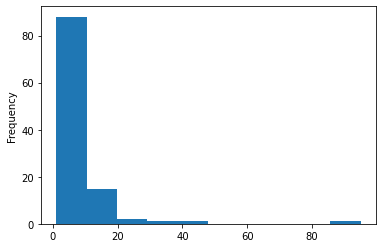

In [49]:
bairros_cont['qtd'].plot.hist()

In [50]:
bairros_cont.loc[bairros_cont['qtd'] <= 10]

,bairro,qtd,pct
0,Aerolândia,2,0.24
2,Alto da Balança,9,1.10
4,Ancuri,1,0.12
5,Antônio Bezerra,10,1.22
6,Autran Nunes,1,0.12
...,...,...,...
101,Tauape,10,1.22
102,Varjota,1,0.12
103,Vicente Pinzón,4,0.49
104,Vila Peri,3,0.37


In [51]:
121-108


13

In [52]:
lista = [0, 3,6, 221, 370,378, 685, 708,709,718, 788, 795]
estranhos = resultado.iloc[resultado.index.isin(lista)]
estranhos.to_csv('estranhos.csv')
estranhos

,inscricao,contribuinte,end,categoria,lat_gMaps,lng_gMaps,bairro_gMaps,bairro_name,bairro_GID
0,230390-6,ABIJCSUD,R ELVIRA PINHO 220 MONTESE FORTALEZA - CE CE...,Outras religiosidades,-3.766739,-38.557352,Montese,Montese,103
3,8615-0,ALFA 2 SPE EMPREENDIMENTO IMOBILIARIO LTDA,R DELMIRO DE FARIAS 1900 QUADRA 50A RODOLFO T...,Sem Definição,-3.744217,-38.553188,Rodolfo Teófilo,Rodolfo Teófilo,34
6,305745-3,ANTONIO NEUTON OLIVEIRA,R DIADEMA 172 CONJUNTO PALMEIRAS FORTALEZA -...,Sem Definição,-3.844593,-38.522297,Conjunto Palmeiras,Conjunto Palmeiras,117
221,20456-0,BANCO BRADESCO S.A.,Pç PORTUGAL 44 ALDEOTA FORTALEZA - CE CEP:60...,Sem Definição,-3.733301,-38.498060,Aldeota,Aldeota,2
370,493191-2,EMPREENDIMENTO EDUCACIONAL MARACANAU LTDA,R CARNEIRO DA CUNHA 110 5-A JACARECANGA FORT...,Sem Definição,-3.724550,-38.541351,Jacarecanga,Centro,10
378,163556-5,FRANCISCO SANDRO MARTINS,R MATOS VASCONCELLOS 886 DAMAS FORTALEZA - C...,Sem Definição,-3.753324,-38.552300,Damas,Damas,13
685,165664-3,INSPETORIA MARIA AUXILIADORA,R OSWALDO ARANHA 31 PARANGABA FORTALEZA - CE...,Sem Definição,-3.783159,-38.572056,Parangaba,Parangaba,105
708,353125-2,JORGE LUIZ ALBUQUERQUE ARRUDA,R IV (CIDADE OESTE) L033 Q004 QUINTINO CUNH...,Sem Definição,-3.726094,-38.602103,Quintino Cunha,Quintino Cunha,48
709,260889-8,JOSE ITALO RODRIGUES SANTIAGO,R ATAULFO ALVES 326 LOTE 09_Q-_25_JD_DAS_OLIV...,Sem Definição,-3.784268,-38.497311,Jardim Das Oliveiras,Jardim das Oliveiras,62
718,42817-5,MARIA ERINEIDE FERNANDES,R SEN CATUNDA 100 BENFICA FORTALEZA - CE CEP:...,Sem Definição,-3.739884,-38.536174,Benfica,Benfica,7


In [55]:
bairros_cont

,bairro,qtd,pct
0,Aerolândia,2,0.24
1,Aldeota,21,2.56
2,Alto da Balança,9,1.10
3,Amadeu Furtado,12,1.47
4,Ancuri,1,0.12
...,...,...,...
103,Vicente Pinzón,4,0.49
104,Vila Peri,3,0.37
105,Vila União,8,0.98
106,Vila Velha,15,1.83


In [77]:
pop2020

,BAIRRO,0-9,10-18,19-59,60+,TOTAL,fbairro
0,AEROLANDIA,1614,1949,7537,1345,12445,aerolandia
1,AEROPORTO,1549,1899,5466,528,9442,aeroporto
2,ALDEOTA,3694,5064,29621,8032,46411,aldeota
3,ALTO DA BALANCA,1861,2027,8391,1760,14039,alto da balanca
4,ALVARO WEYNE,3367,3891,15594,3103,25955,alvaro weyne
...,...,...,...,...,...,...,...
116,VILA ELLERY,1040,1209,5298,1067,8614,vila ellery
117,VILA MANOEL SATIRO,2613,2925,11685,1974,19197,vila manoel satiro
118,VILA PERI,2764,3249,13966,2640,22619,vila peri
119,VILA UNIAO,2082,2343,10352,2071,16848,vila uniao


In [73]:
resumo

Categoria,Bairro,Católica Apostólica Romana,Espírita,Evangélicas,Outras religiosidades,Sem Definição,Total
0,Centro,34,1,57,2,1,95
1,Rodolfo Teófilo,31,1,10,2,2,46
2,Benfica,21,7,3,2,2,35
3,Aldeota,11,1,6,2,1,21
4,Messejana,11,0,6,4,0,21
...,...,...,...,...,...,...,...
103,Parque Santa Rosa,0,0,1,0,0,1
104,Padre Andrade,0,0,1,0,0,1
105,Couto Fernandes,0,0,0,0,1,1
106,Bom Futuro,0,0,1,0,0,1


In [105]:
col_filter = ['Bairro', 'Católica Apostólica Romana', 'Espírita', 'Evangélicas',
       'Outras religiosidades', 'Sem Definição', 'Total', 'TOTAL']
templos_pop_bairro = pd.merge(resumo.reset_index(), gBairros_pop, left_on='Bairro', right_on='bairro').filter(col_filter)

templos_pop_bairro.rename(columns={'TOTAL':'População do Bairro','Total':'Número Total de Templos'}, inplace=True)
templos_pop_bairro['Taxa de templos por 100 mil Habitantes'] = round(templos_pop_bairro['Número Total de Templos']*100000/templos_pop_bairro['População do Bairro'],2)


templos_pop_bairro= templos_pop_bairro.sort_values(by='Número Total de Templos', ascending = False).head(20)
templos_pop_bairro.to_csv('resumo_templos_por_bairro.csv', index=False)
templos_pop_bairro

,Bairro,Católica Apostólica Romana,Espírita,Evangélicas,Outras religiosidades,Sem Definição,Número Total de Templos,População do Bairro,Taxa de templos por 100 mil Habitantes
0,Centro,34,1,57,2,1,95,31268,303.82
1,Rodolfo Teófilo,31,1,10,2,2,46,20940,219.68
2,Benfica,21,7,3,2,2,35,14193,246.60
4,Messejana,11,0,6,4,0,21,45675,45.98
3,Aldeota,11,1,6,2,1,21,46411,45.25
5,José Bonifácio,15,0,1,2,0,18,9693,185.70
6,Parangaba,4,2,7,1,4,18,33906,53.09
7,Mondubim,2,0,9,5,0,16,62264,25.70
8,Vila Velha,4,1,7,2,1,15,67508,22.22
9,Álvaro Weyne,7,0,4,3,0,14,25955,53.94
